## Executive Summary:

This report is about predicting housing sale prices. To predict the prices two data sets were used, one is the Housing_Data_Train.csv and another one is Housing_Data_Test.csv.

Imagine you have a dataset of houses with various features like size, number of bedrooms, when built, when sold, condition of garage, basement, electricity, heating, air condition etc., and you want to predict their prices. The goal is to build a model that makes accurate predictions considering the core features as the maximum potential of a house.

Here's what the code does:

It starts by loading the housing data and finding the major features undergoing different steps of data pre-processing 

Then, it splits the data into two parts: the "training" set and the "validation" set. The training set is used to teach the model how to make predictions, and the validation set is used to check how well the model is doing.

The code creates a linear regression model, which is a way to make predictions based on the data.

It trains the model using the training data, so the model learns from the features of the houses and their actual prices.

After training, the model makes predictions on the validation set and calculates how accurate those predictions are.

It repeats these steps while varying the complexity of the model. In simpler terms, it tries to build models that could predict target value with accuracy incorporating changes in the elemental data.

Finally, it plots a graph that shows how well each model performs. This graph has a U-shape, and here's what it means:

On the left side of the U (the simple models), both the training and validation errors are high. This is underfitting because the model is too basic to make good predictions.
In the middle of the U, the errors are the lowest. This is the "sweet spot" where the model is just right in terms of complexity.

On the right side of the U (the complex models), the training error becomes very low, but the validation error starts going up. This is overfitting because the model is too complex and starts making bad predictions on new data.
In essence, the code shows that finding the right balance in model complexity is crucial. Too simple or too complex models both lead to poor predictions. The goal is to strike the right balance in the middle of the U-shaped curve where the model generalizes well to new, unseen data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np

## Data Pre-Processing:

At first, a train data set for predicting housing sale prices was loaded using Pandas DataFrame in a two-dimensional tabular data structure.

In the first step of data pre-processing, a chart to check the data type and the number of non-missing values in each column of the training data set was charted using the info() method. Then the describe() method shows the statistical summary of the training data.

Afterward, the checkNull() function was used to find the columns with the missing and Not-a-Number (NaN) values of the training dataset as a series object with your missing data counts, which was illustrated as a heatmap and pie chart for better understanding.

In the next step, features were extracted depending on some major points:

    1. Removing features with more than half of missing values i.e. Unnamed: 0, MiscFeature, PoolQC, Alley, and Fence.
    
    2. Filling the missing values of the features that have less null values and high priority to predict the price. In this phase, the categorical features were divided into two parts, numerical and qualitative. 
    
        i. The mean of all values of a particular feature was assigned for the missing values in the case of numerical data using the fillNa() method. LotFrontage, MasVnrArea, etc. are such features
        
        ii. A similar method was used for qualitative data like Electrical, MasVnrType, GarageCond, etc to fill the missing values using the mode of that feature set. The non-numerical categorical data were mapped to numerical data using the LabelEncoder() classes_ function that labels data as integers depending on the labels.
        
    3. Influential features i.e. MSSubClass, LotArea, etc. with no missing data.
   
In the last step of pre-processing, the dataset was extracted into features (X) and target (y) sets.

In [2]:
#Load train and test data set:
train_data = pd.read_csv("Housing_Data_Train.csv")
test_data = pd.read_csv("Housing_Data_Test.csv")

In [3]:
# Visualize train features data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Id             1000 non-null   int64  
 2   MSSubClass     1000 non-null   int64  
 3   MSZoning       1000 non-null   object 
 4   LotFrontage    814 non-null    float64
 5   LotArea        1000 non-null   int64  
 6   Street         1000 non-null   object 
 7   Alley          66 non-null     object 
 8   LotShape       1000 non-null   object 
 9   LandContour    1000 non-null   object 
 10  Utilities      1000 non-null   object 
 11  LotConfig      1000 non-null   object 
 12  LandSlope      1000 non-null   object 
 13  Neighborhood   1000 non-null   object 
 14  Condition1     1000 non-null   object 
 15  Condition2     1000 non-null   object 
 16  BldgType       1000 non-null   object 
 17  HouseStyle     1000 non-null   object 
 18  OverallQu

In [4]:
# Visualize statistical summary of training data 
train_data.describe().T

count           mean           std      min        25%  \
Unnamed: 0     1000.0     499.500000    288.819436      0.0     249.75   
Id             1000.0     725.853000    422.179162      1.0     353.75   
MSSubClass     1000.0      58.165000     43.579318     20.0      20.00   
LotFrontage     814.0      70.120393     25.730561     21.0      59.00   
LotArea        1000.0   10778.454000  11647.964726   1477.0    7559.50   
OverallQual    1000.0       6.088000      1.365328      1.0       5.00   
OverallCond    1000.0       5.578000      1.108668      1.0       5.00   
YearBuilt      1000.0    1970.550000     30.609908   1872.0    1953.00   
YearRemodAdd   1000.0    1984.620000     20.682296   1950.0    1966.75   
MasVnrArea      994.0     100.989940    169.554306      0.0       0.00   
BsmtFinSF1     1000.0     440.793000    459.445085      0.0       0.00   
BsmtFinSF2     1000.0      46.877000    163.906355      0.0       0.00   
BsmtUnfSF      1000.0     566.091000    436.109714      0.0     222.25   
TotalBsmtSF    1000.0    1053.761000    436.063012      0.0     800.00   
1stFlrSF       1000.0    1157.822000    376.454917    372.0     891.00   
2ndFlrSF       1000.0     344.359000    428.940075      0.0       0.00   
LowQualFinSF   1000.0       5.394000     46.661033      0.0       0.00   
GrLivArea      1000.0    1507.575000    506.011630    605.0    1136.25   
BsmtFullBath   1000.0       0.427000      0.518594      0.0       0.00   
BsmtHalfBath   1000.0       0.054000      0.230515      0.0       0.00   
FullBath       1000.0       1.555000      0.541542      0.0       1.00   
HalfBath       1000.0       0.370000      0.497340      0.0       0.00   
BedroomAbvGr   1000.0       2.866000      0.797923      0.0       2.00   
KitchenAbvGr   1000.0       1.050000      0.231416      0.0       1.00   
TotRmsAbvGrd   1000.0       6.488000      1.576814      3.0       5.00   
Fireplaces     1000.0       0.630000      0.656911      0.0       0.00   
GarageYrBlt     939.0    1978.026624     25.029031   1900.0    1960.00   
GarageCars     1000.0       1.755000      0.763910      0.0       1.00   
GarageArea     1000.0     469.382000    216.271444      0.0     312.00   
WoodDeckSF     1000.0      93.351000    125.172089      0.0       0.00   
OpenPorchSF    1000.0      46.471000     64.132598      0.0       0.00   
EnclosedPorch  1000.0      23.112000     62.992535      0.0       0.00   
3SsnPorch      1000.0       2.898000     26.742827      0.0       0.00   
ScreenPorch    1000.0      14.375000     55.447460      0.0       0.00   
PoolArea       1000.0       2.735000     38.827985      0.0       0.00   
MiscVal        1000.0      42.000000    521.970740      0.0       0.00   
MoSold         1000.0       6.307000      2.729139      1.0       5.00   
YrSold         1000.0    2007.832000      1.332498   2006.0    2007.00   
SalePrice      1000.0  178403.271000  71476.841901  52500.0  128987.50   

                    50%        75%       max  
Unnamed: 0        499.5     749.25     999.0  
Id                732.5    1089.50    1455.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        70.0      80.00     313.0  
LotArea          9544.5   11475.75  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1972.0    2000.00    2009.0  
YearRemodAdd     1993.0    2004.00    2010.0  
MasVnrArea          0.0     167.50    1115.0  
BsmtFinSF1        382.0     704.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         478.0     813.25    2336.0  
TotalBsmtSF       990.5    1301.00    6110.0  
1stFlrSF         1085.5    1377.25    4692.0  
2ndFlrSF            0.0     728.00    1540.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1456.0    1769.50    5642.0  
BsmtFullBath        0.0       1.00       2.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0

In [5]:
# Function that returns the feature including null value
def checkNull(dataset):
    nullfeatures = (dataset.isnull().sum()).sort_values(ascending=False) 
    nullfeatures = nullfeatures[nullfeatures>0]
    return nullfeatures

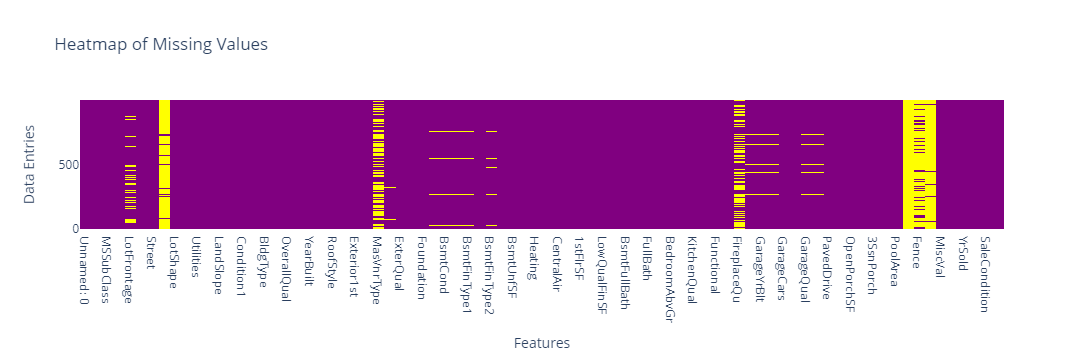

In [6]:
 # Null Values
featureNan = checkNull(train_data)

# Creating heatmap of missing values using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=train_data.isnull().astype(int),
                   colorscale=[[0, 'purple'], [1, 'yellow']],
                   showscale=False,
                   x=train_data.columns,
                   y=train_data.index))

# Set the title for the plot and name the x and y axes
fig.update_layout(title="Heatmap of Missing Values",
                  xaxis_title="Features",
                  yaxis_title="Data Entries")

# Show the plot
fig.show()

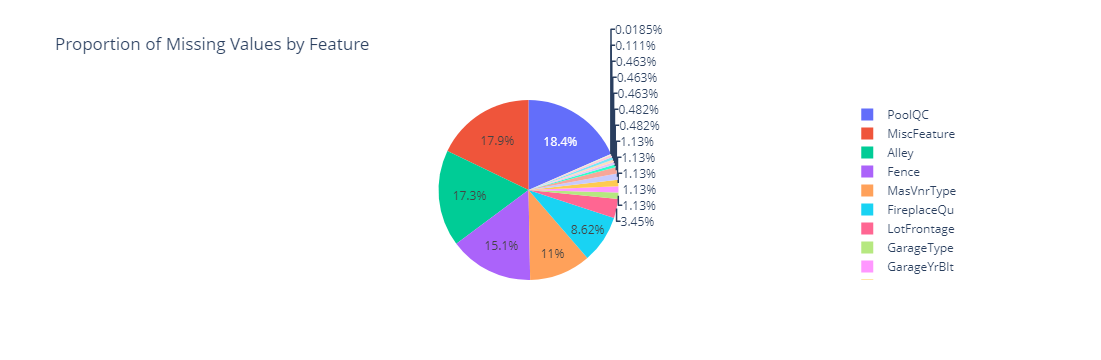

In [7]:
# Assuming featureNan is the series object with your missing data counts
fig = px.pie(data_frame=featureNan.reset_index(), names='index', values=0, 
             title="Proportion of Missing Values by Feature")

# Display the plot
fig.show()

The pie chart depicts that the PoolQC, MiscFeature, Alley, and Fence features have missing values of 18.4%, 17.9%, 17.3%, and 15.1% of overall missing values in the dataset respectively.

In [8]:
train_data.drop(columns=['Unnamed: 0','Id','PoolQC','Alley','Fence','MiscFeature'],inplace=True)
test_data.drop(columns=['Unnamed: 0','Id','PoolQC','Alley','Fence','MiscFeature'],inplace=True)

##### Filling Null Values of Numerical Data

In [9]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

##### Filling Null Values of Qualitative Data

In [10]:
train_data['Electrical']=train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data['HeatingQC']=train_data['HeatingQC'].fillna(train_data['HeatingQC'].mode()[0])
train_data['CentralAir']=train_data['CentralAir'].fillna(train_data['CentralAir'].mode()[0])

In [11]:
le = LabelEncoder()
train_data['Electrical'] = le.fit_transform(train_data['Electrical'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'FuseA': 0, 'FuseF': 1, 'FuseP': 2, 'Mix': 3, 'SBrkr': 4}


In [12]:
le = LabelEncoder()
train_data['MasVnrType'] = le.fit_transform(train_data['MasVnrType'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2}


In [13]:
le = LabelEncoder()
train_data['GarageType'] = le.fit_transform(train_data['GarageType'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5}


In [14]:
le = LabelEncoder()
train_data['GarageCond'] = le.fit_transform(train_data['GarageCond'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}


In [15]:
le = LabelEncoder()
train_data['HeatingQC'] = le.fit_transform(train_data['HeatingQC'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}


In [16]:
le = LabelEncoder()
train_data['CentralAir'] = le.fit_transform(train_data['CentralAir'])

# Display the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'N': 0, 'Y': 1}


In [17]:
# Separate features (X) and target (y)
X = train_data[["MSSubClass", "LotArea", "LotFrontage" , "OverallQual", "OverallCond", "MasVnrArea" , "GarageYrBlt", "Electrical", "MasVnrType", "GarageType", "GarageCond", "HeatingQC", "CentralAir"]]
y = train_data["SalePrice"]

## Modelling and Model Tuning:

At this point, the training data was split into training and validation sets using the train_test_split() method from model_selection in scikit learn. Here, 'X_train' and 'y_train' are the feature matrix and target variable for the training set, that are used as the machine learning model to train the data. Furthermore, to evaluate the performance of your trained model 'X_val' and 'y_val' are the the feature matrix and target variable for the validation set. 

To ensure the data was split in the same way while running the code multiple times and get a consistent result the 'random_state' parameter value was fixed to 42.

The 'test_size' argument mainly specifies the percentage of data allocated for the validation set. The model's performance evaluation depends on this value as the percentage of data used for training and testing could be the reason for overfitting, underfitting, hyperparameter tuning, bias analysis, etc. In this case, different values were used to fit the model between 20% - 50% (0.2 - 0.5).

The model was fitted with Linear Regression to predict values for the feature matrix-based target variable, which was stored in 'y_val_pred'. This was done using the LinearRegression() method from linear_model in the scikit learn library.

The Mean Squared Error (MSE) and Root Mean Square Error (RMSE) were measured by the mean_squared_error() method from metrics in the scikit learn. The best result was found for the 'test_size' value 0.27, which means 27% of data was used for validation and 73% for training the model. The MSE value is  1607236946.850902 and RMSE value is 40090.35977452562 for 'test_size'. The lowest error was found for 'test_size' 0.4, though it could lead to overfitting.

In [18]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.27, random_state=42)
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_val_pred = lr_model.predict(X_val)

In [19]:
# Calculate the Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse)
# Calculate the Root Mean Squared Error (RMSE) on the validation set
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("Validation RMSE:", rmse)

Validation MSE: 1607236946.850902
Validation RMSE: 40090.35977452562


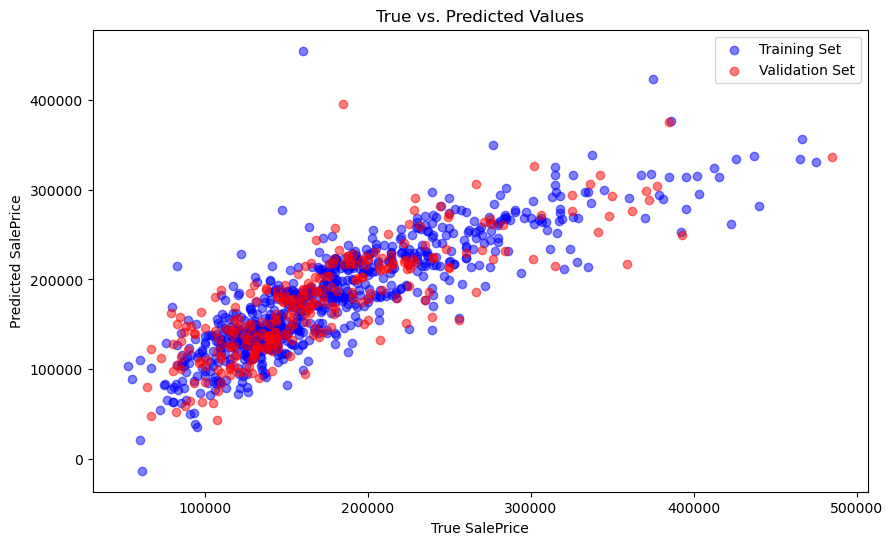

In [20]:
# Make predictions on the training set
y_train_pred = lr_model.predict(X_train)

# Make predictions on the validation set
y_val_pred = lr_model.predict(X_val)

# Scatter plot of true vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label='Training Set')
plt.scatter(y_val, y_val_pred, alpha=0.5, color='red', label='Validation Set')
plt.title("True vs. Predicted Values")
plt.xlabel("True SalePrice")
plt.ylabel("Predicted SalePrice")
plt.legend()
plt.show()

In this graph, the training set sale prices were plotted against the validation set sale prices using matplotlib methods. The blue points represent the training set prices, whereas the red ones stand for the validation set prices.

## Final Model :

A list of positive numerical values was generated using tolist() from the predicted prices.

A loss function was then calculated to find the simple loss. In this case, (Predicted Sale Price - Actual Sale Price)^2 formula was used to find the loss.

In [21]:
# Convert the predictions to a list of positive integers
list_predictions = y_val_pred.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[157388, 188171, 261575, 124352, 116195, 127045, 304082, 214995, 249008, 100392, 141435, 217660, 123353, 222536, 167316, 97035, 252730, 217480, 59559, 193275, 149125, 213157, 186374, 133193, 224140, 168391, 281302, 113720, 184705, 213729, 127249, 151354, 261091, 250268, 240028, 135308, 234002, 175857, 202763, 169982, 229796, 204066, 188918, 185640, 173505, 155170, 221813, 149964, 217113, 104427, 140109, 170122, 193277, 172729, 174503, 182928, 219460, 148594, 222448, 121801, 146627, 150965, 84550, 212812, 80823, 138308, 138978, 211570, 97532, 163387, 216801, 155583, 140830, 142834, 120655, 102248, 186217, 122801, 118513, 148190, 148531, 315731, 133190, 262107, 168930, 288042, 102834, 180075, 115682, 179789, 113038, 290287, 157986, 336313, 218296, 124427, 225581, 141655, 201259, 125682, 184712, 226298, 137687, 114282, 209997, 162679, 276309, 98499, 306409, 277617, 216475, 176308, 141495, 271653, 394948, 146702, 205868, 273175, 95623, 181700, 109332, 94435, 96420, 194370, 177054, 136138, 

#### Leaderboard score:

In [22]:
def my_answer_list():
    return [157388, 188171, 261575, 124352, 116195, 127045, 304082, 214995, 249008, 100392, 141435, 217660, 123353, 222536, 167316, 97035, 252730, 217480, 59559, 193275, 149125, 213157, 186374, 133193, 224140, 168391, 281302, 113720, 184705, 213729, 127249, 151354, 261091, 250268, 240028, 135308, 234002, 175857, 202763, 169982, 229796, 204066, 188918, 185640, 173505, 155170, 221813, 149964, 217113, 104427, 140109, 170122, 193277, 172729, 174503, 182928, 219460, 148594, 222448, 121801, 146627, 150965, 84550, 212812, 80823, 138308, 138978, 211570, 97532, 163387, 216801, 155583, 140830, 142834, 120655, 102248, 186217, 122801, 118513, 148190, 148531, 315731, 133190, 262107, 168930, 288042, 102834, 180075, 115682, 179789, 113038, 290287, 157986, 336313, 218296, 124427, 225581, 141655, 201259, 125682, 184712, 226298, 137687, 114282, 209997, 162679, 276309, 98499, 306409, 277617, 216475, 176308, 141495, 271653, 394948, 146702, 205868, 273175, 95623, 181700, 109332, 94435, 96420, 194370, 177054, 136138, 126579, 188305, 141724, 152852, 225554, 136109, 48228, 133350, 192039, 112856, 110729, 163131, 150557, 103365, 132971, 162104, 259272, 122214, 167598, 306348, 121233, 185564, 293029, 232567, 218622, 219883, 131434, 129858, 270808, 223200, 196001, 135185, 52747, 201517, 125669, 64293, 163087, 153315, 167487, 214429, 226758, 225156, 103526, 188582, 211865, 326637, 269437, 138425, 178405, 139520, 84684, 141955, 224334, 100661, 170737, 297931, 76358, 119127, 63736, 222768, 232920, 181227, 187345, 150939, 202664, 44103, 228654, 178983, 188039, 152506, 133685, 159305, 180599, 177674, 155374, 203739, 216856, 179040, 94208, 123509, 257403, 294500, 137156, 202430, 218670, 126873, 141712, 238519, 106827, 178231, 173490, 132833, 172378, 243521, 146725, 138770, 232065, 90752, 98674, 187096, 63016, 212311, 143409, 375051, 193579, 180988, 162102, 145780, 180723, 144906, 230344, 217693, 158175, 150286, 126438, 145753, 111516, 187266, 110581, 181308, 99514, 215321, 221128, 114841, 86175, 199861, 115167, 175339, 175196, 128999, 127835, 189268, 276317, 134175, 138198, 220759, 190110, 216841, 137347, 155047, 263709, 223231, 267592, 157936]

# Final score
finalScore = my_answer_list()
print(finalScore)

[157388, 188171, 261575, 124352, 116195, 127045, 304082, 214995, 249008, 100392, 141435, 217660, 123353, 222536, 167316, 97035, 252730, 217480, 59559, 193275, 149125, 213157, 186374, 133193, 224140, 168391, 281302, 113720, 184705, 213729, 127249, 151354, 261091, 250268, 240028, 135308, 234002, 175857, 202763, 169982, 229796, 204066, 188918, 185640, 173505, 155170, 221813, 149964, 217113, 104427, 140109, 170122, 193277, 172729, 174503, 182928, 219460, 148594, 222448, 121801, 146627, 150965, 84550, 212812, 80823, 138308, 138978, 211570, 97532, 163387, 216801, 155583, 140830, 142834, 120655, 102248, 186217, 122801, 118513, 148190, 148531, 315731, 133190, 262107, 168930, 288042, 102834, 180075, 115682, 179789, 113038, 290287, 157986, 336313, 218296, 124427, 225581, 141655, 201259, 125682, 184712, 226298, 137687, 114282, 209997, 162679, 276309, 98499, 306409, 277617, 216475, 176308, 141495, 271653, 394948, 146702, 205868, 273175, 95623, 181700, 109332, 94435, 96420, 194370, 177054, 136138, 

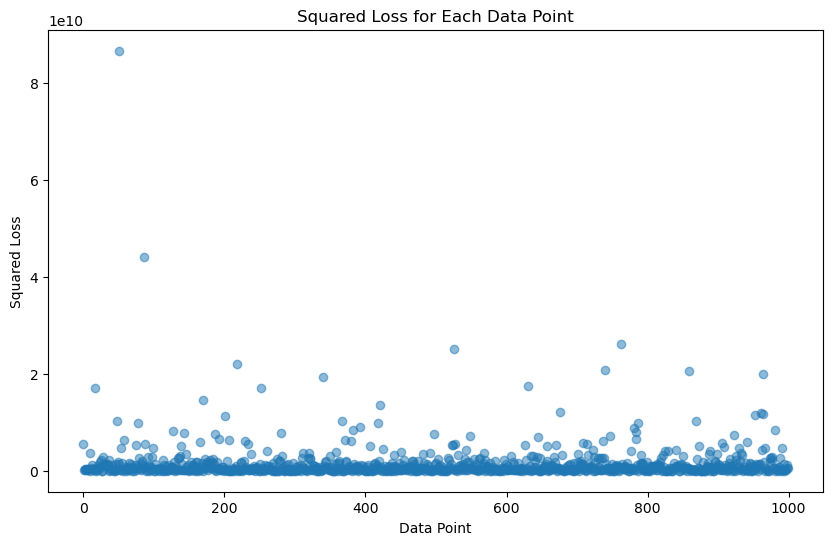

In [23]:
# Make predictions on the entire dataset
y_pred = lr_model.predict(X)

# Calculate the squared loss for each data point
squared_losses = (y_pred - y) ** 2

# Scatter plot of squared loss vs. data point
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), squared_losses, alpha=0.5)
plt.title("Squared Loss for Each Data Point")
plt.xlabel("Data Point")
plt.ylabel("Squared Loss")
plt.show()

This graph illustrates the square loss to demonstrate the loss function. For most of the predicted sale prices, the cost varies between 0 - 0.3 compared to the actual sale price, which means the calculated losses were minimal for most of the predicted sale price. The estimated sale prices are close to the actual price and have some minor errors.

## Demonstration of Overfitting vs Underfitting:

#### Overfitting (High Complexity):

As we use a large number of features (close to the total number), training error decreases significantly because the model can fit the training data very well, including noise. Validation error starts increasing because the model fails to generalize to unseen data, resulting in poor performance. The "U"-shaped curve has the validation error increasing while the training error decreases.

#### Underfitting (Low Complexity):

As we use too few features, the model is overly simplistic. Training error increases because the model cannot capture the underlying patterns in the data. Validation error remains high because the model lacks the complexity to generalize.
The "U"-shaped curve shows both training and validation errors increasing as complexity decreases. The generalization gap, represented by the difference between training and validation errors, is an important indicator. In the underfitting scenario, the gap is smaller but the errors are high, indicating both training and validation errors are bad.


#### Balanced Fit (Optimal Complexity):

There's an optimal number of features that result in the lowest validation error, achieving a good balance. Both training and validation errors are relatively low and close to each other in this region. The balanced fit scenario demonstrates the point at which the model achieves the best trade-off between bias (underfitting) and variance (overfitting), resulting in the lowest validation error.

Training Error: 1415271169.9489055
Validation Error: 1607236946.850902


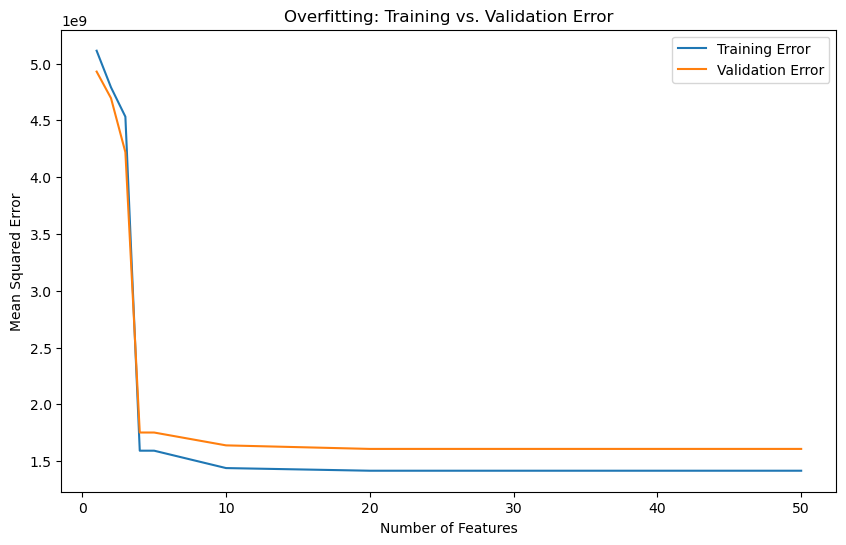

In [24]:
# Vary the number of features (e.g., increasing them)
num_features = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
train_errors = []
test_errors = []

for num in num_features:
    # Select the first 'num' features from the dataset
    X_train_subset = X_train.iloc[:, :num]
    X_val_subset = X_val.iloc[:, :num]

    # Initialize and train the linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_subset, y_train)

    # Calculate training error
    train_pred = lr_model.predict(X_train_subset)
    train_error = mean_squared_error(y_train, train_pred)

    # Calculate validation error
    val_pred = lr_model.predict(X_val_subset)
    val_error = mean_squared_error(y_val, val_pred)

    train_errors.append(train_error)
    test_errors.append(val_error)
    
    # Print training and validation errors
print(f"Training Error: {train_error}")
print(f"Validation Error: {val_error}")

# Plot the U-shaped curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training Error')
plt.plot(num_features, test_errors, label='Validation Error')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting: Training vs. Validation Error')
plt.legend()
plt.show()

At this point depending on several increasing features subsets were created for the two feature matrixs 'X_train_subset' and 'X_val_subset'. After fitting the model with Linear Regression the training error and validation error were calculated. Here, the training error is 1415271169.9489055 and the validation error is 1607236946.850902

Afterwards, the error values were plotted in the graph against the number of features, which produced a U - U-shaped curve. For 0 - 5 features the curves were gradually decreasing. However, there was a sharp decline around the point of 5 features and the MSE curves for both the training and validation errors remain almost constant from that point.

In [25]:
# Use a minimal number of features (e.g., 1)
num_features = 1

# Select the first 'num_features' from the dataset
X_train_subset = X_train.iloc[:, :num_features]
X_val_subset = X_val.iloc[:, :num_features]

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_subset, y_train)

# Calculate training error
train_pred = lr_model.predict(X_train_subset)
train_error = mean_squared_error(y_train, train_pred)

# Calculate validation error
val_pred = lr_model.predict(X_val_subset)
val_error = mean_squared_error(y_val, val_pred)

# Print training and validation errors
print(f"Training Error: {train_error}")
print(f"Validation Error: {val_error}")


Training Error: 5112802981.773093
Validation Error: 4929015454.146313


In a similar way, depending on a minimal feature subsets were created for the two feature matrixes 'X_train_subset' and 'X_val_subset'. After fitting the model with Linear Regression the training error and validation error were calculated. Here, the training error is 5112802981.773093 and the validation error is 4929015454.146313.

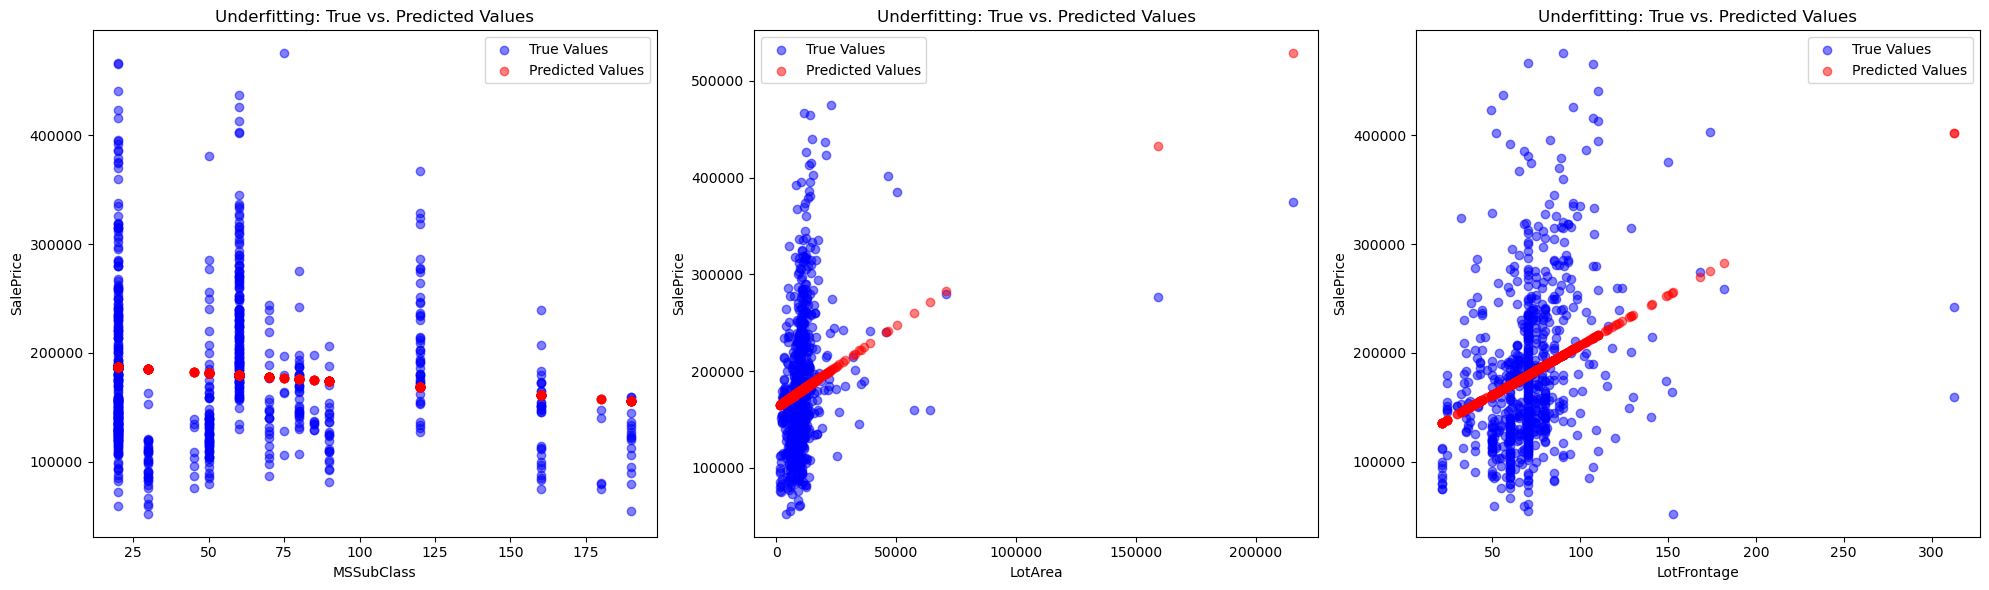

In [26]:
plt.figure(figsize=(20, 6))

#training subset for "MSSubClass"
X_subset = X_train[["MSSubClass"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("MSSubClass")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "LotArea"
X_subset = X_train[["LotArea"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "LotFrontage"
X_subset = X_train[["LotFrontage"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.legend()


plt.tight_layout()  # Adjusts the spaces between the plots for better layout
plt.show()

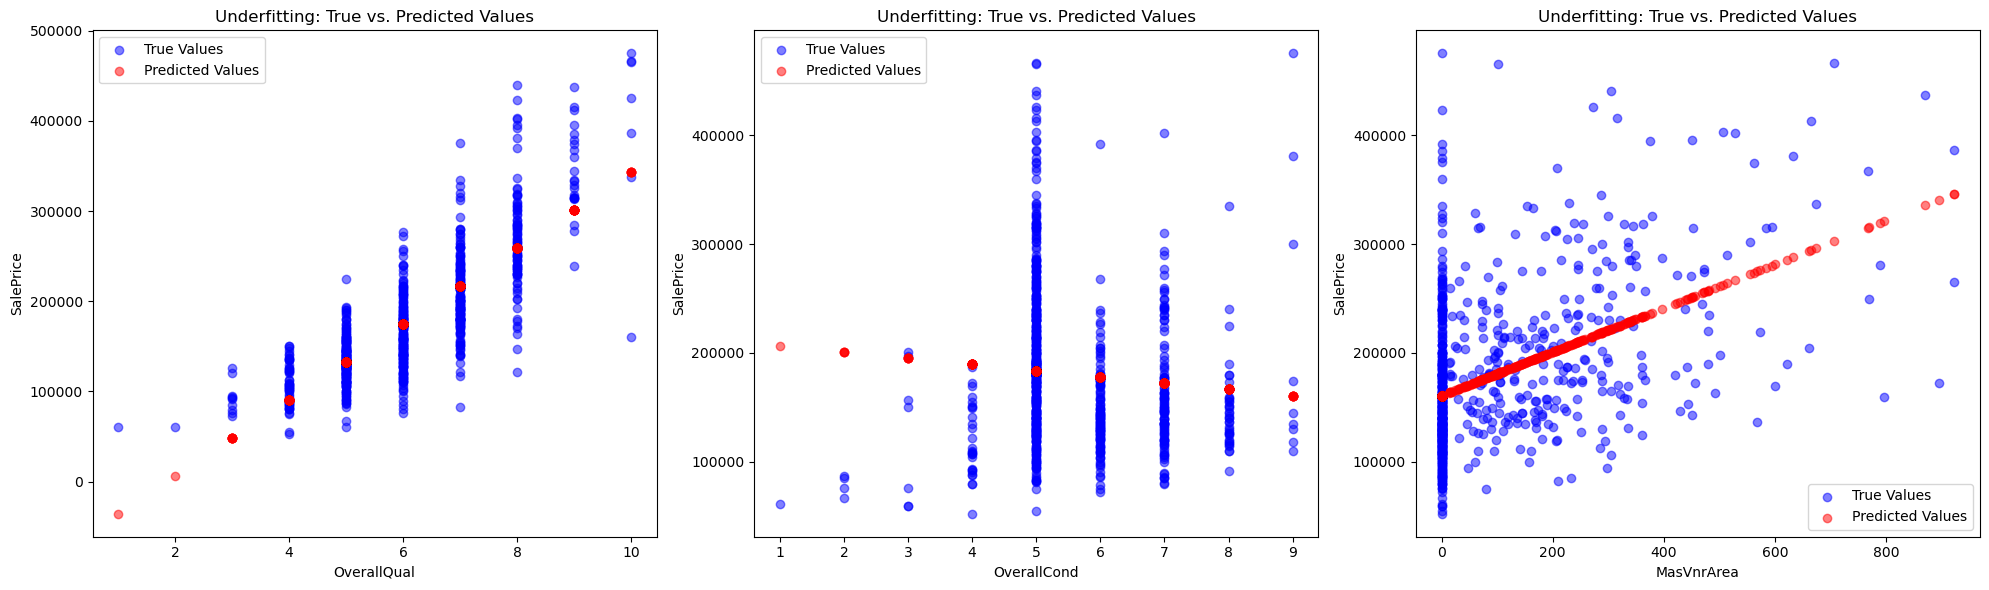

In [27]:
plt.figure(figsize=(20, 6))

#training subset for "OverallQual"
X_subset = X_train[["OverallQual"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "OverallCond"
X_subset = X_train[["OverallCond"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "MasVnrArea"
X_subset = X_train[["MasVnrArea"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.legend()

plt.tight_layout()  # Adjusts the spaces between the plots for better layout
plt.show()

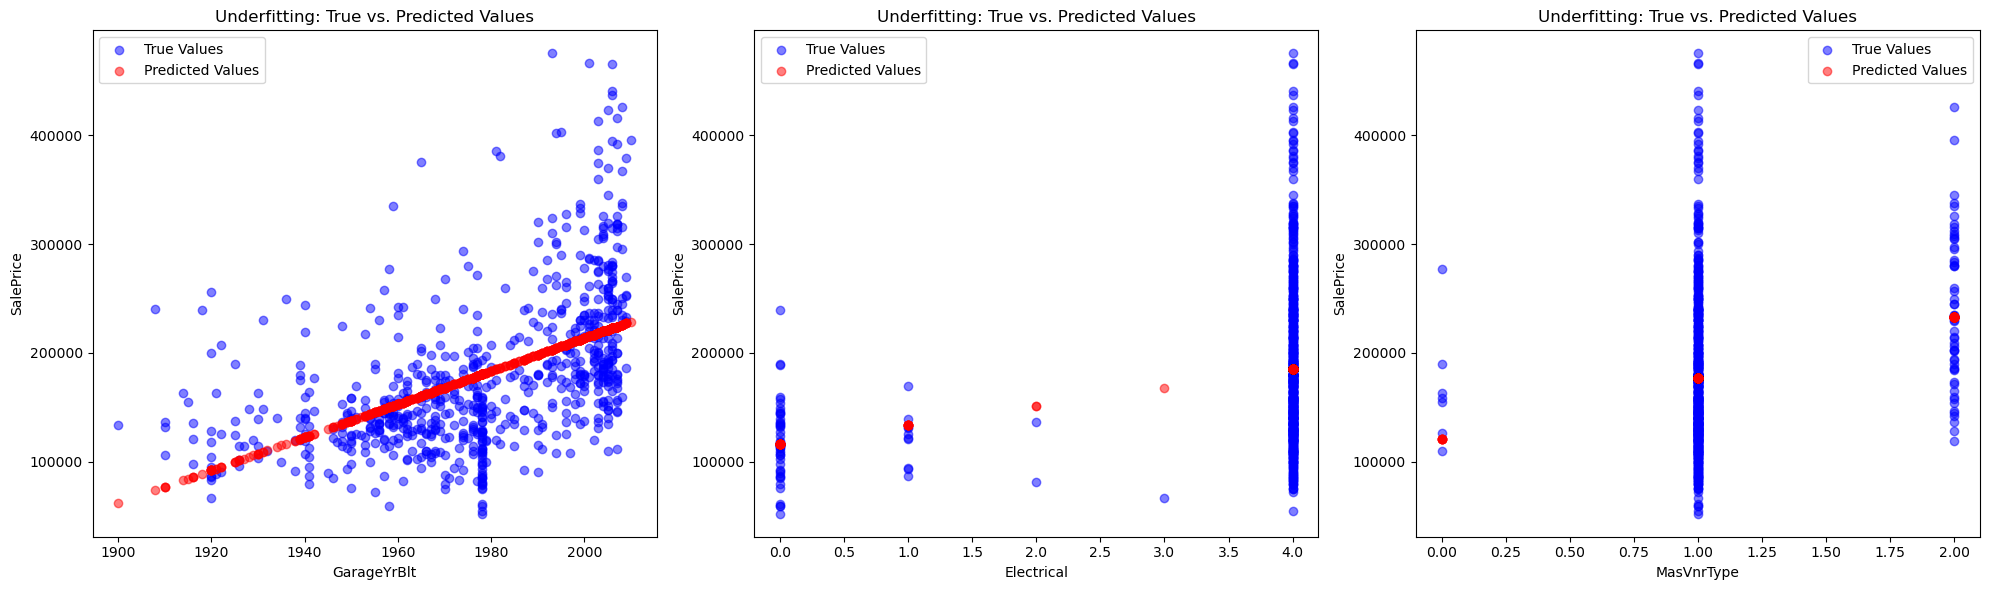

In [28]:
plt.figure(figsize=(20, 6))

#training subset for "GarageYrBlt"
X_subset = X_train[["GarageYrBlt"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("GarageYrBlt")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "Electrical"
X_subset = X_train[["Electrical"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("Electrical")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "MasVnrType"
X_subset = X_train[["MasVnrType"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("MasVnrType")
plt.ylabel("SalePrice")
plt.legend()

plt.tight_layout()  # Adjusts the spaces between the plots for better layout
plt.show()

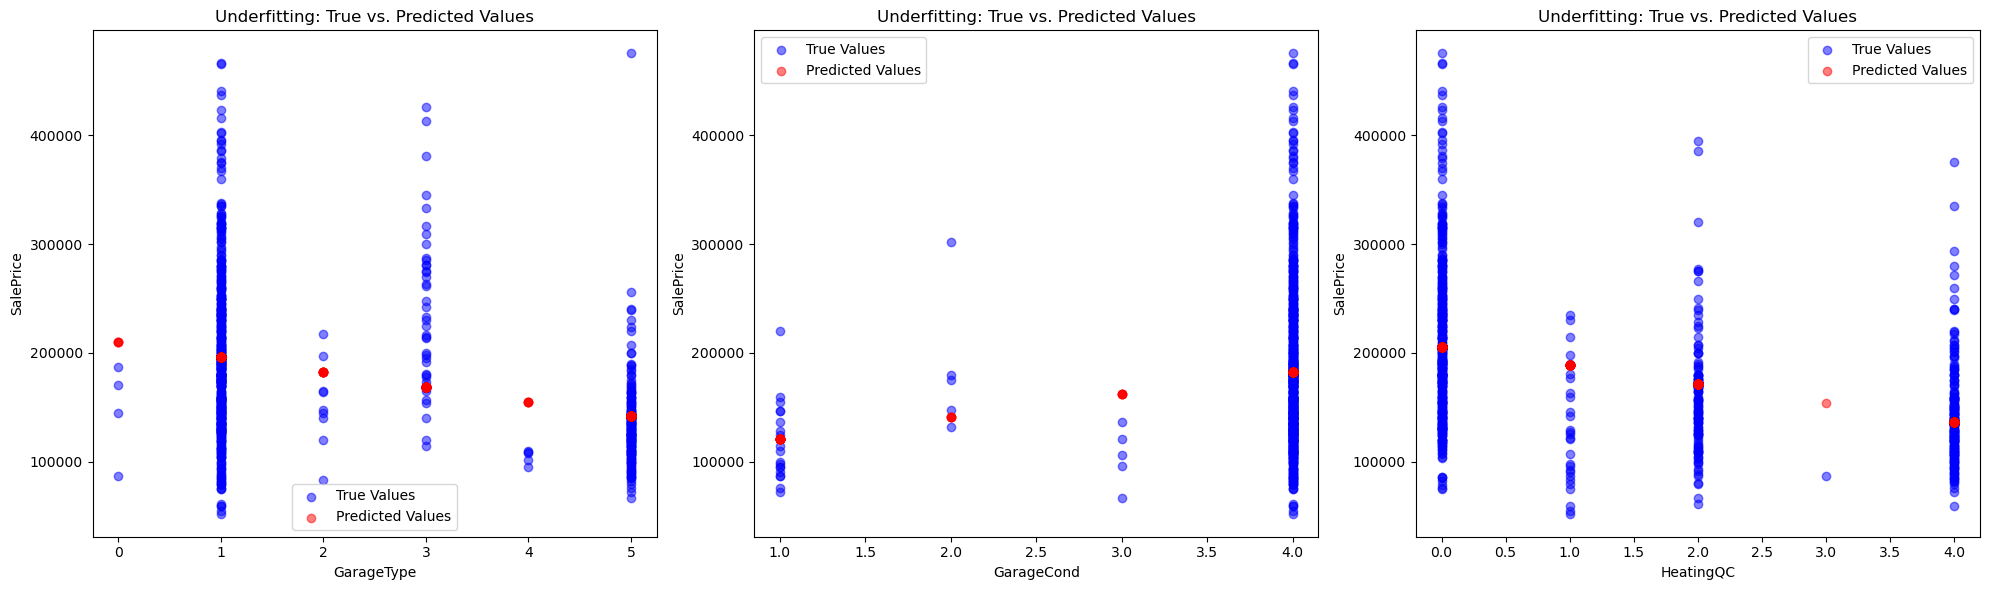

In [29]:
plt.figure(figsize=(20, 6))

#training subset for "GarageType"
X_subset = X_train[["GarageType"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("GarageType")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "GarageCond"
X_subset = X_train[["GarageCond"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("GarageCond")
plt.ylabel("SalePrice")
plt.legend()


#training subset for "HeatingQC"
X_subset = X_train[["HeatingQC"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("HeatingQC")
plt.ylabel("SalePrice")
plt.legend()

plt.tight_layout()  # Adjusts the spaces between the plots for better layout
plt.show()

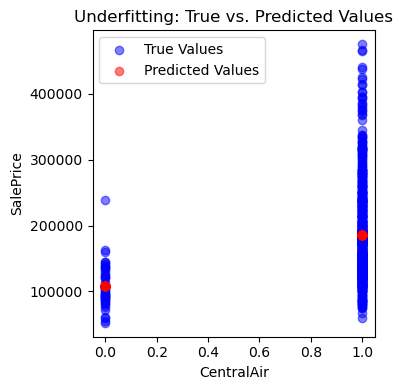

In [30]:

plt.figure(figsize=(10, 4))

#training subset for "CentralAir"
X_subset = X_train[["CentralAir"]]

# Initialize and train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_subset, y_train)

# Make predictions on the training data
y_train_pred = lr_model.predict(X_subset)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.scatter(X_subset, y_train, alpha=0.5, label='True Values', c='blue')
plt.scatter(X_subset, y_train_pred, alpha=0.5, label='Predicted Values', c='red')
plt.title("Underfitting: True vs. Predicted Values")
plt.xlabel("CentralAir")
plt.ylabel("SalePrice")
plt.legend()

plt.tight_layout()  # Adjusts the spaces between the plots for better layout
plt.show()

However, to test the underfitting the training subsets were created for all the features used to fit the model. In the case of all the features the sale prices were increasing moderately with the rise of the feature variables.

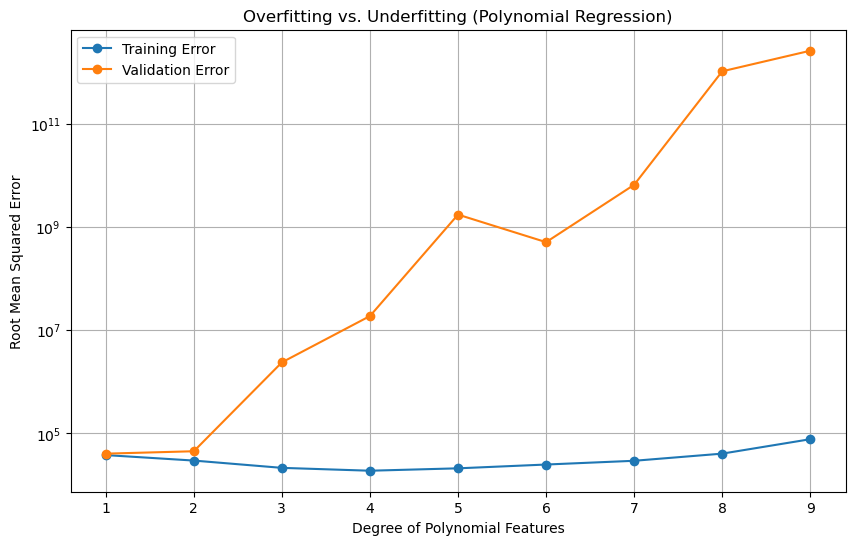

In [31]:
# Create lists to store training and validation errors
train_errors = []
val_errors = []

# Vary the degree of polynomial features
degrees = range(1, 10)  # You can adjust this range as needed

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.27, random_state=42)
    
    # Initialize and train a Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Calculate training and validation errors (Root Mean Squared Error)
    train_pred = lr_model.predict(X_train)
    val_pred = lr_model.predict(X_val)
    
    train_error = mean_squared_error(y_train, train_pred, squared=False)
    val_error = mean_squared_error(y_val, val_pred, squared=False)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, val_errors, label="Validation Error", marker='o')
# Using a log scale for better visualization
plt.yscale('log')
plt.title("Overfitting vs. Underfitting (Polynomial Regression)")
plt.xlabel("Degree of Polynomial Features")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

##### The relationship between model complexity and error can be visualized using a U-curve:
    
    X-axis: Represents model complexity (e.g., degree of a polynomial in polynomial regression).

    Y-axis: Represents error (could be Mean Squared Error, Mean Absolute Error, etc.).

    Training Error: Typically decreases as model complexity increases.

    Validation Error: As model complexity increases the U-curve fluctuates at some points, but mostly follows an upward trend.

##### The U-curve is so named because the validation error forms a U shape:

    1. The left side of the U represents underfitting: both training and validation errors are high because the model does not capture the underlying association in the dataset it was trained. 
    
    2. The bottom of the U represents the optimal model complexity: validation error is at its lowest.

    3. The right side of the U represents overfitting: training error continues to decrease, but validation error starts to rise as the model begins to fit the noise in the training data.

##### Recommendations for Housing Price Prediction:

    Feature Selection: Given that housing price datasets often contain a mix of numerical and categorical features, it's essential to select relevant features and transform or encode them appropriately.

    Regularization: Techniques like Ridge and Lasso regression can help in preventing overfitting by adding penalty terms for large coefficients.
    
    Model Evaluation: Split the data into training, validation, and test sets. Evaluate model performance on the validation set during hyperparameter tuning and on the test set for the final performance metric.

    Complexity: Start with a simple model (e.g., linear regression) and increase complexity as needed. Monitor performance on both training and validation datasets to avoid overfitting.